# Trabajo Práctico Semanal 4
Teoria de circuitos II

### Sandomir L Uriel

#### Se requiere diseñar un filtro activo siguendo las condiciones impuestas en la siguiente plantilla de diseño:

<img src="https://i.gyazo.com/76c5cc92af657d7f7f92a63b0ebe15e8.png"/>

* Cheby con Ripple = 0.5dB
* $\omega_o = 2\pi22$ kHz
* $Q = 5$
* $f_{S1} = 17$kHz con -16dB
* $f_{S2} = 36$kHz con -24dB

#### Plantilla normalizada:

$ \Omega_{\omega} = \omega_0 $

<img src="https://i.gyazo.com/ac484c15d83809083704b54bcefbfb60.png"/>

In [1]:
import numpy as np
import scipy.signal as sig
import splane as tc2
import matplotlib.pyplot as plt
w0 = 1
ws1 = 17/22
ws2 = 36/22
qq = 5
alpha_max = 0.5
alpha_min1 = 16
alpha_min2 = 24

Diseñaremos un prototipo de Filtro Pasa-Bajos Chebyshev y aplicaremos el nucleo de transformacion para obtener un Pasa-Banda.
<br><br>
Podemos calcular los extremos del ancho de banda de paso, conociendo Q y $\omega_0$:

<img src="https://i.gyazo.com/a36a7ed7483cf04bea0876b4d556df9e.png"/>

### Diseño del prototipo Pasa-Bajos Chevyshev:

Para obtener la pulsacion de corte de nuestro modelo Pasa-Bajos, utilizamos las siguientes expresiones:

<img src="https://i.gyazo.com/a2dfb608048f03bdf9661be497c401e7.png"/>

In [2]:
print("Verificacion numerica - Frecuencia de corte del modelo Pasa-Bajos")
Ome1 = qq * (ws1**2 - 1) / ws1
Ome2 = qq * (ws2**2 - 1) / ws2
Ome1,Ome2

Verificacion numerica - Frecuencia de corte del modelo Pasa-Bajos


(-2.606951871657754, 5.126262626262627)

Obtenemos 2 posibles pulsaciones de corte, utilizaremos ambos para determinar el orden de nuestro filtro segun lo indique la condicion con mayor exigencia.
<br>
#### Calculo de Epsilon:

<img src="https://i.gyazo.com/cbba879e5abc567f917230598ccd2c0b.png"/>

In [3]:
print("Verificacion numerica - Epsilon cuadrado")
ee = np.sqrt(10**(alpha_max/10) - 1)
ee**2

Verificacion numerica - Epsilon cuadrado


0.12201845430196336

#### Calculo de Epsilon:

<img src="https://i.gyazo.com/d6b085c9ef37a1db6ddab56be4a7e405.png"/>
<img src="https://i.gyazo.com/06db7cdd4c5b4b1339f95cb23069d6e4.png"/>

Podemos observar que un filtro de orden 3 cumple ambas condiciones impuestas las frecuencias de corte del prototipo Pasa-Banda.
<br><br>
Conociendo $\xi^2$ y el orden del polinomio de Chevyshev, podemos calcular los coeficientes del denominador de nuestra funcion Pasa-Bajos:

<img src="https://i.gyazo.com/828771a29107aeac4a12bd6cefbac4d1.png"/>

In [4]:
print("Verificacion numerica - Funcion Pasa-Bajos")
nn = 3 
z,p,k = sig.cheb1ap (nn, alpha_max)
num_lp, den_lp = sig.zpk2tf(z,p,k)
tc2.pretty_print_lti(num_lp, den_lp)

Verificacion numerica - Funcion Pasa-Bajos


<IPython.core.display.Math object>

Resta ahora, aplicar el nucleo de transformacion a nuestra funcion Pasa-Bajos para obtener nuestro prototipo Pasa-Banda:
<br><br>
$s \rightarrow \frac{Q(s^2 + 1)}{s}$

<img src="https://i.gyazo.com/e2d59b97778cd8b961acf4215ece27a0.png"/>

In [6]:
print("Verificacion numerica - Funcion Pasa-Banda")
num_bp, den_bp = sig.lp2bp(num_lp, den_lp)
tc2.pretty_print_lti(num_bp, den_bp)

Verificacion numerica - Funcion Pasa-Banda


<IPython.core.display.Math object>

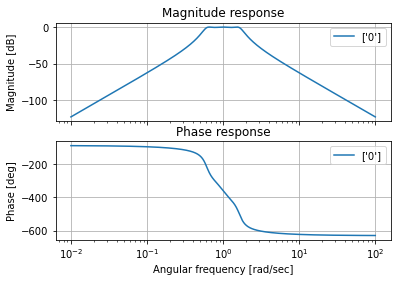

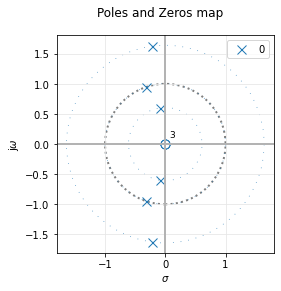

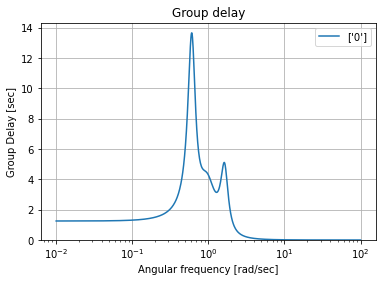

In [7]:
filter_bp = sig.TransferFunction(num_bp, den_bp)
tc2.analyze_sys(filter_bp)

### Implementacion pasiva

Para implementar nuestra funcion transferencia de filtro Pasa-Banda, podemos hacerlo con 3 secciones correspondiendo a cada uno de las 3 SOS obtenidos.
<br><br>
Utilizamos el siguiente modelo de filtro Pasa-Banda pasivo:

<img src="https://i.gyazo.com/3a551056f44c08718ef61aaa0fe1f05d.png"/>

La funcion de transferencia de este filtro resulta:
$\frac{V_o}{V_i} = \frac{\frac{1}{RC}}{s^2 + s \frac{1}{RC} + \frac{1}{LC}} $
<br>
Si adoptamos $C_{1-2-3} = 1$:
<br><br>
$SOS_1$:
<br><br>
$\omega_{01}^2 = 1 = \frac{1}{C_1L_1} \rightarrow L_1 = 1$
<br><br>
$\frac{\omega_{01}}{Q_1} = \frac{1}{R_1C_1} \rightarrow R_1 = Q_1 = 7.98 $
<br><br>
$SOS_2$:
<br><br>
$\omega_{02}^2 = 1.227 = \frac{1}{C_2L_2} \rightarrow L_2 = 0.815$
<br><br>
$\frac{\omega_{02}}{Q_2} = \frac{1}{R_2C_2} \rightarrow R_2 = \frac{Q_2}{\omega_{02}} = 14.48 $
<br><br>
$SOS_3$:
<br><br>
$\omega_{03}^2 = 0.8145 = \frac{1}{C_3L_3} \rightarrow L_3 = 0.069$
<br><br>
$\frac{\omega_{03}}{Q_3} = \frac{1}{R_3C_3} \rightarrow R_3 = \frac{Q_3}{\omega_{03}} = 19.01 $
<br><br>

<img src="https://i.gyazo.com/081a1d5a25f51e31cd6d515a8e0b6575.png"/>
<img src="https://i.gyazo.com/0b407f660e27024cd452e9f2994e7e4d.png"/>

### Implementacion activa

Podemos activar las bobinas de nuestro circuito mediante GICs de Antoniou de la siguiente manera:



<img src="https://i.gyazo.com/f055c48cdcaff704264cb538b68d00c5.png"/>
<br><br>
Las resitencias Ra y Rb aportan la ganancia $H = 12.58$ segun:
<br>
$R_a = \frac{R_1}{H}$ y $R_b = \frac{R_1}{1-H}$
<br><br>
Si bien cada etapa tiene una ganacia especifica, conviene implementar el total de ganancia de todos los filtros previa a la entrada de estos, con el fin de no amplificar el ruido que aportan los componentes que los conforman.
<br><br>
Los GICs de Antoniou entregan una señal de salida del doble de amplitud que la señal de entrada, por lo que para eliminar este efecto, colocamos un divisor capacitivo con una atenuacion de $a = 6$ veces en la salida de la tercera etapa:
<br><br>
<img src="https://i.gyazo.com/11d73befdccfbfae7295d407716c99de.png"/>
<br><br>
Podemos observar sobre las frecuencias de corte: $\omega_{s1} . \frac{1}{2\pi f_s} = \frac{17}{22} . \frac{1}{2000\pi} = 123$mHz  y  $\omega_{s2} . \frac{1}{2\pi f_s} = \frac{36}{22} . \frac{1}{2000\pi} = 260$mHz donde obtenemos 26.39dB y 44.89dB respectivamente, por lo que consideramos la condicion de atenuacion minima como cumplida.
<br><br>
<img src="https://i.gyazo.com/83eff263513fda9865228a3c9daaa916.png"/>

Para verificar el ripple, basta con medir la atenuacion sobre la banda de paso, donde observamos un ripple menor que 130mdB, por lo que la condicion de atenuacion maxima tambien esta cumplida.